In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# https://www.kaggle.com/datasets/anassarfraz13/student-success-factors-and-insights/data?select=StudentPerformanceFactors.csv
df = pd.read_csv('student_performance_factors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [14]:
df.columns = df.columns.str.lower()
df.columns

Index(['hours_studied', 'attendance', 'parental_involvement',
       'access_to_resources', 'extracurricular_activities', 'sleep_hours',
       'previous_scores', 'motivation_level', 'internet_access',
       'tutoring_sessions', 'family_income', 'teacher_quality', 'school_type',
       'peer_influence', 'physical_activity', 'learning_disabilities',
       'parental_education_level', 'distance_from_home', 'gender',
       'exam_score'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   hours_studied               6607 non-null   int64 
 1   attendance                  6607 non-null   int64 
 2   parental_involvement        6607 non-null   object
 3   access_to_resources         6607 non-null   object
 4   extracurricular_activities  6607 non-null   object
 5   sleep_hours                 6607 non-null   int64 
 6   previous_scores             6607 non-null   int64 
 7   motivation_level            6607 non-null   object
 8   internet_access             6607 non-null   object
 9   tutoring_sessions           6607 non-null   int64 
 10  family_income               6607 non-null   object
 11  teacher_quality             6529 non-null   object
 12  school_type                 6607 non-null   object
 13  peer_influence              6607 non-null   obje

In [16]:
df.describe()

,hours_studied,attendance,sleep_hours,previous_scores,tutoring_sessions,physical_activity,exam_score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [20]:
# first is the numerical columns
numerical_cols = df.select_dtypes(include=["number"]).columns.tolist()
numerical_cols

['hours_studied',
 'attendance',
 'sleep_hours',
 'previous_scores',
 'tutoring_sessions',
 'physical_activity',
 'exam_score']

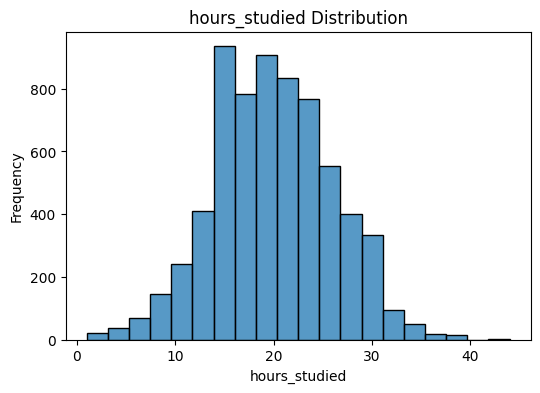

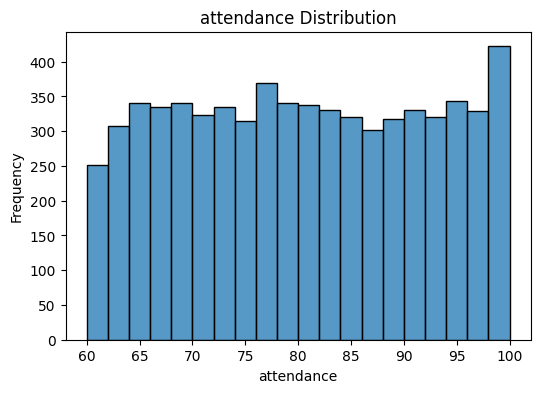

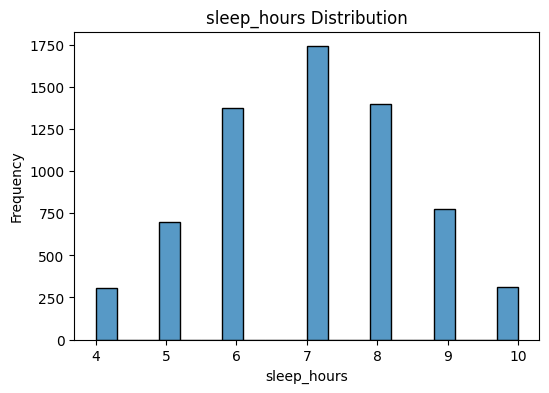

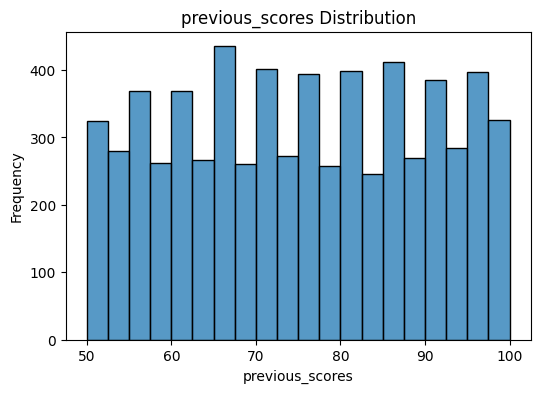

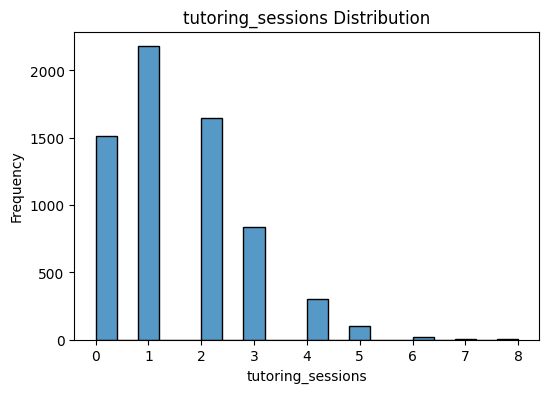

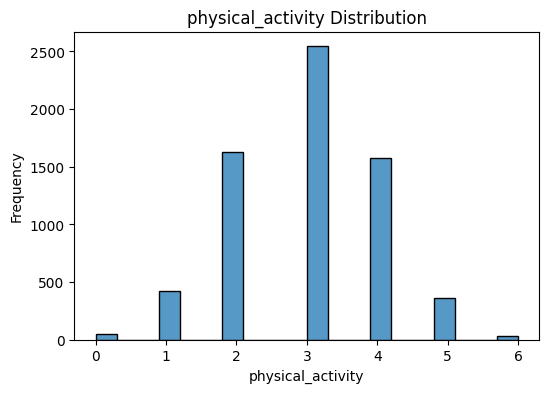

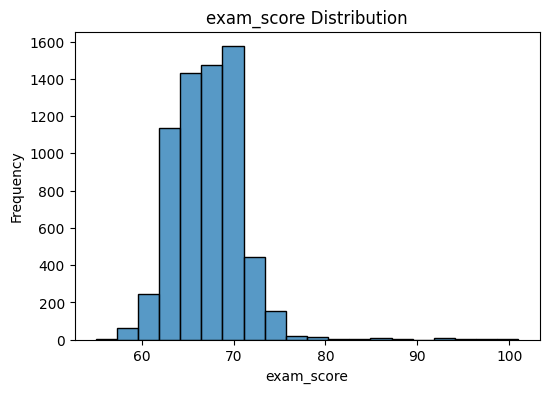

In [ ]:
# creates histograms for each numerical column --> y axis is frequency
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=20)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [24]:
# categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
categorical_cols

['parental_involvement',
 'access_to_resources',
 'extracurricular_activities',
 'motivation_level',
 'internet_access',
 'family_income',
 'teacher_quality',
 'school_type',
 'peer_influence',
 'learning_disabilities',
 'parental_education_level',
 'distance_from_home',
 'gender']

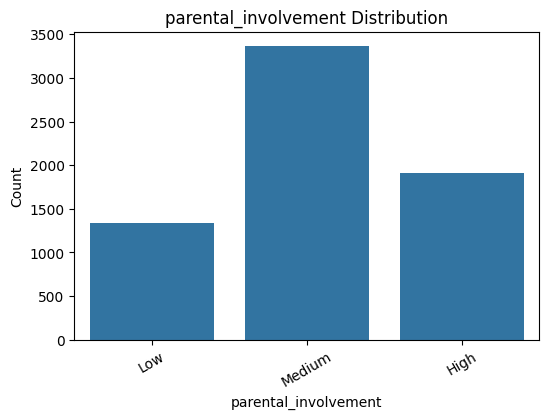

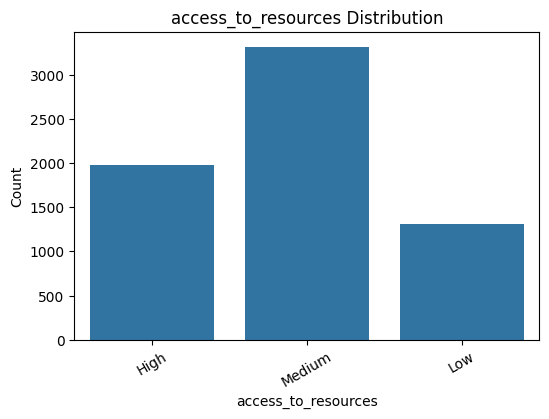

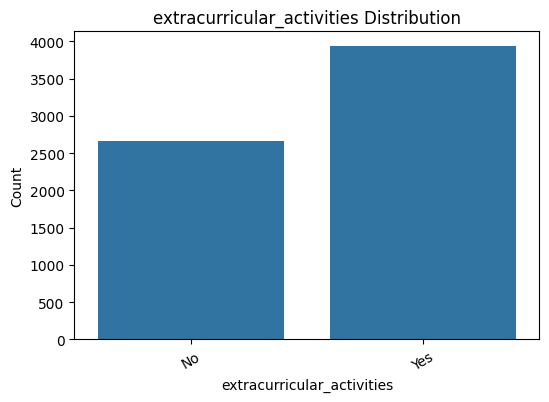

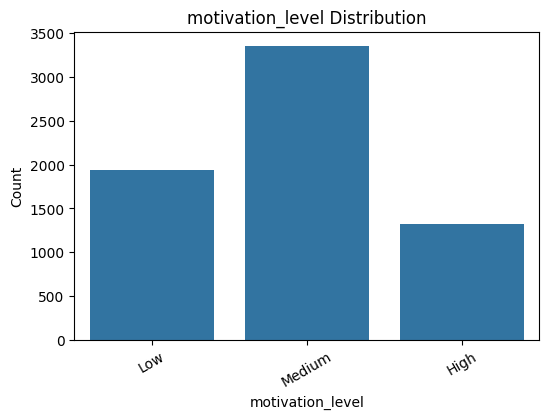

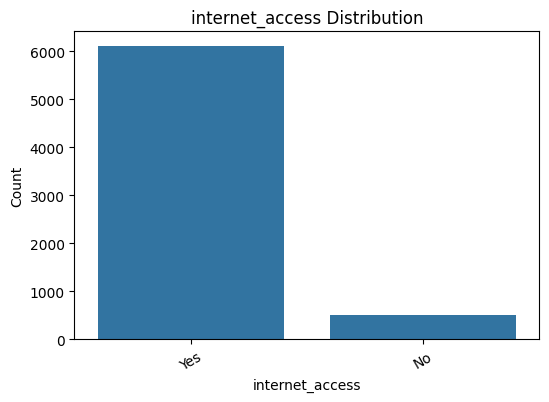

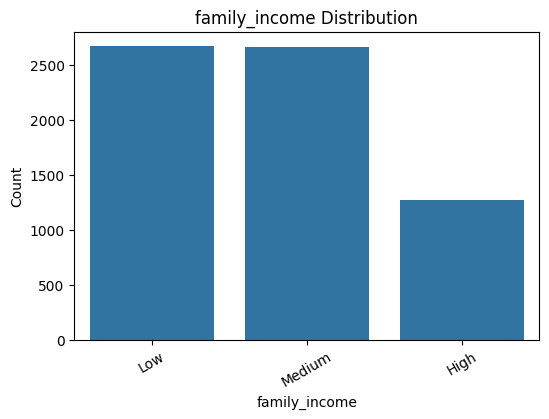

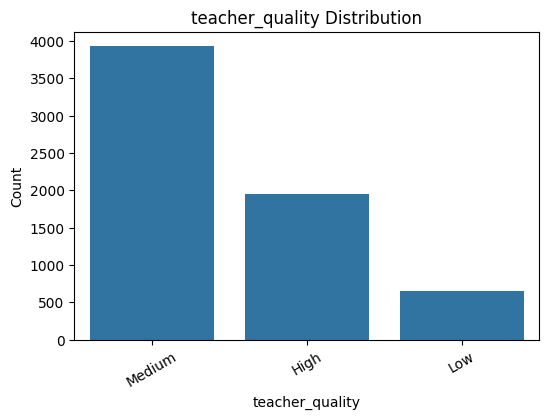

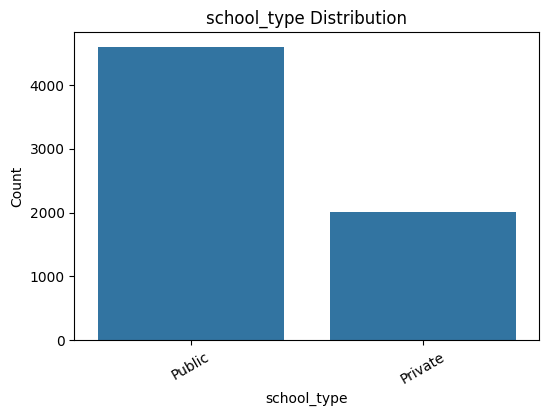

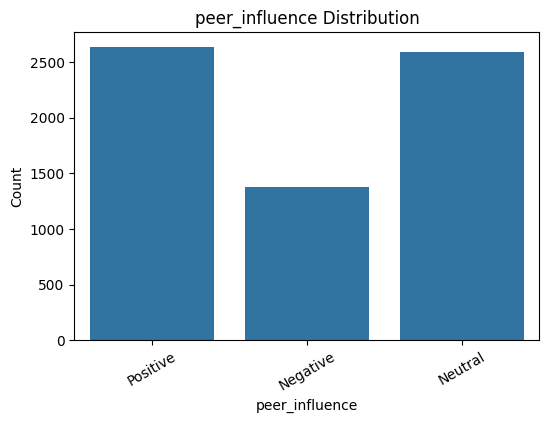

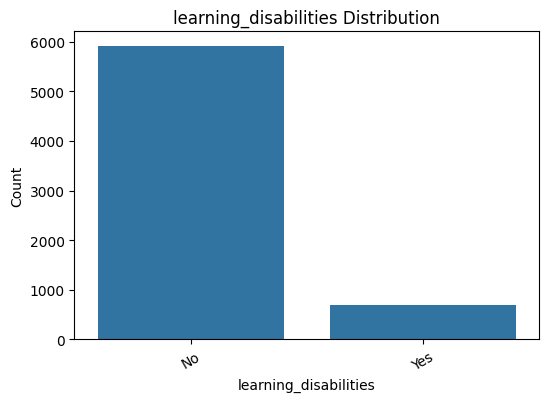

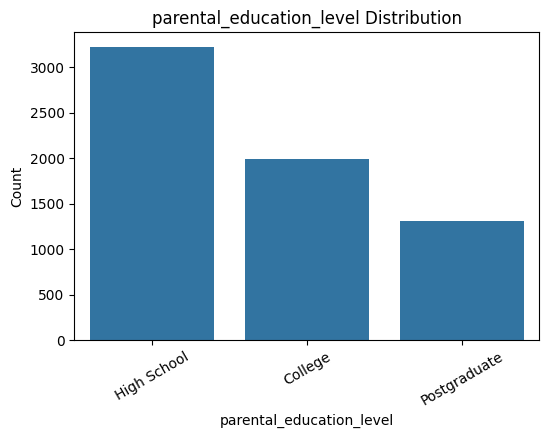

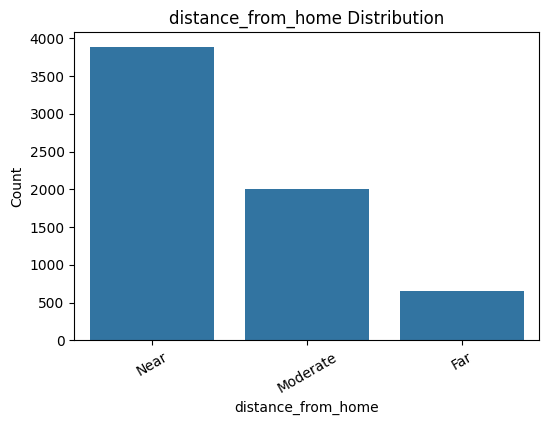

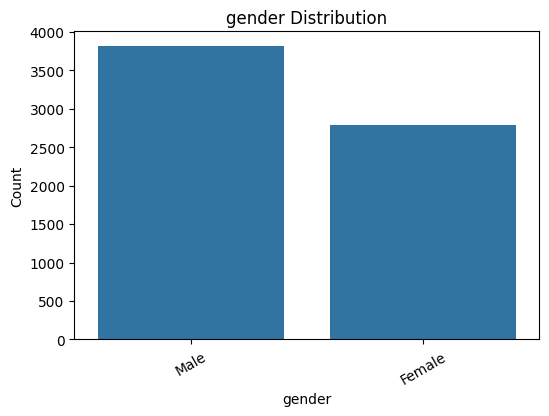

In [25]:
# Plot bar charts for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30)
    plt.show()


In [30]:
# statistical summaries for cols
numerical_summary = df[numerical_cols].describe().T

numerical_summary.rename(columns={"50%": "median"}, inplace=True)

print(numerical_summary[["min", "25%", "median", "75%", "max", "mean"]])




                    min   25%  median   75%    max       mean
hours_studied       1.0  16.0    20.0  24.0   44.0  19.975329
attendance         60.0  70.0    80.0  90.0  100.0  79.977448
sleep_hours         4.0   6.0     7.0   8.0   10.0   7.029060
previous_scores    50.0  63.0    75.0  88.0  100.0  75.070531
tutoring_sessions   0.0   1.0     1.0   2.0    8.0   1.493719
physical_activity   0.0   2.0     3.0   4.0    6.0   2.967610
exam_score         55.0  65.0    67.0  69.0  101.0  67.235659


In [35]:
# count of outliers in each numerical column

Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outliers = (df[numerical_cols] < lower) | (df[numerical_cols] > upper)

outlier_counts = outliers.sum()
print("Outliers:")
outlier_counts


Outliers:


hours_studied         43
attendance             0
sleep_hours            0
previous_scores        0
tutoring_sessions    430
physical_activity      0
exam_score           104
dtype: int64

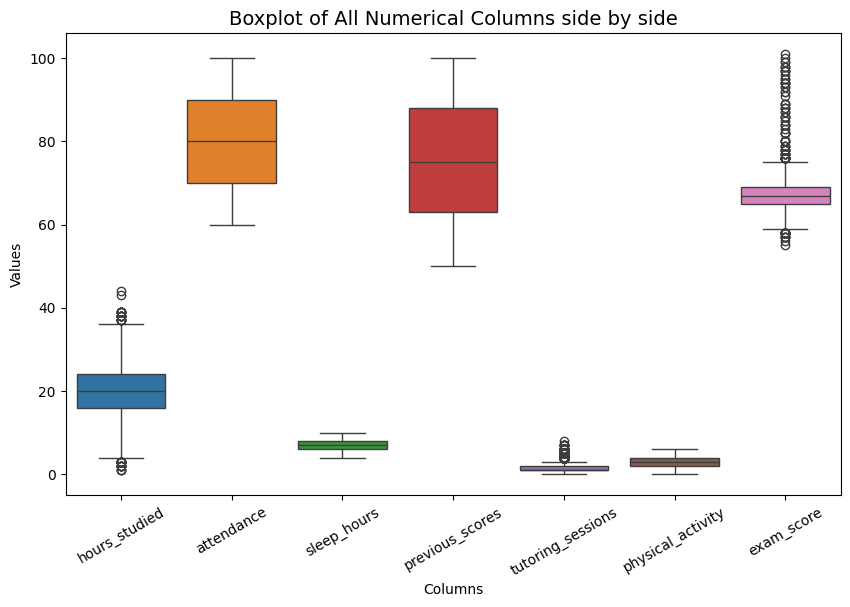

In [42]:
# Plot all numerical columns in one boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_cols])  # dark color palette
plt.title("Boxplot of All Numerical Columns side by side", fontsize=14)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.xticks(rotation=30)
plt.show()


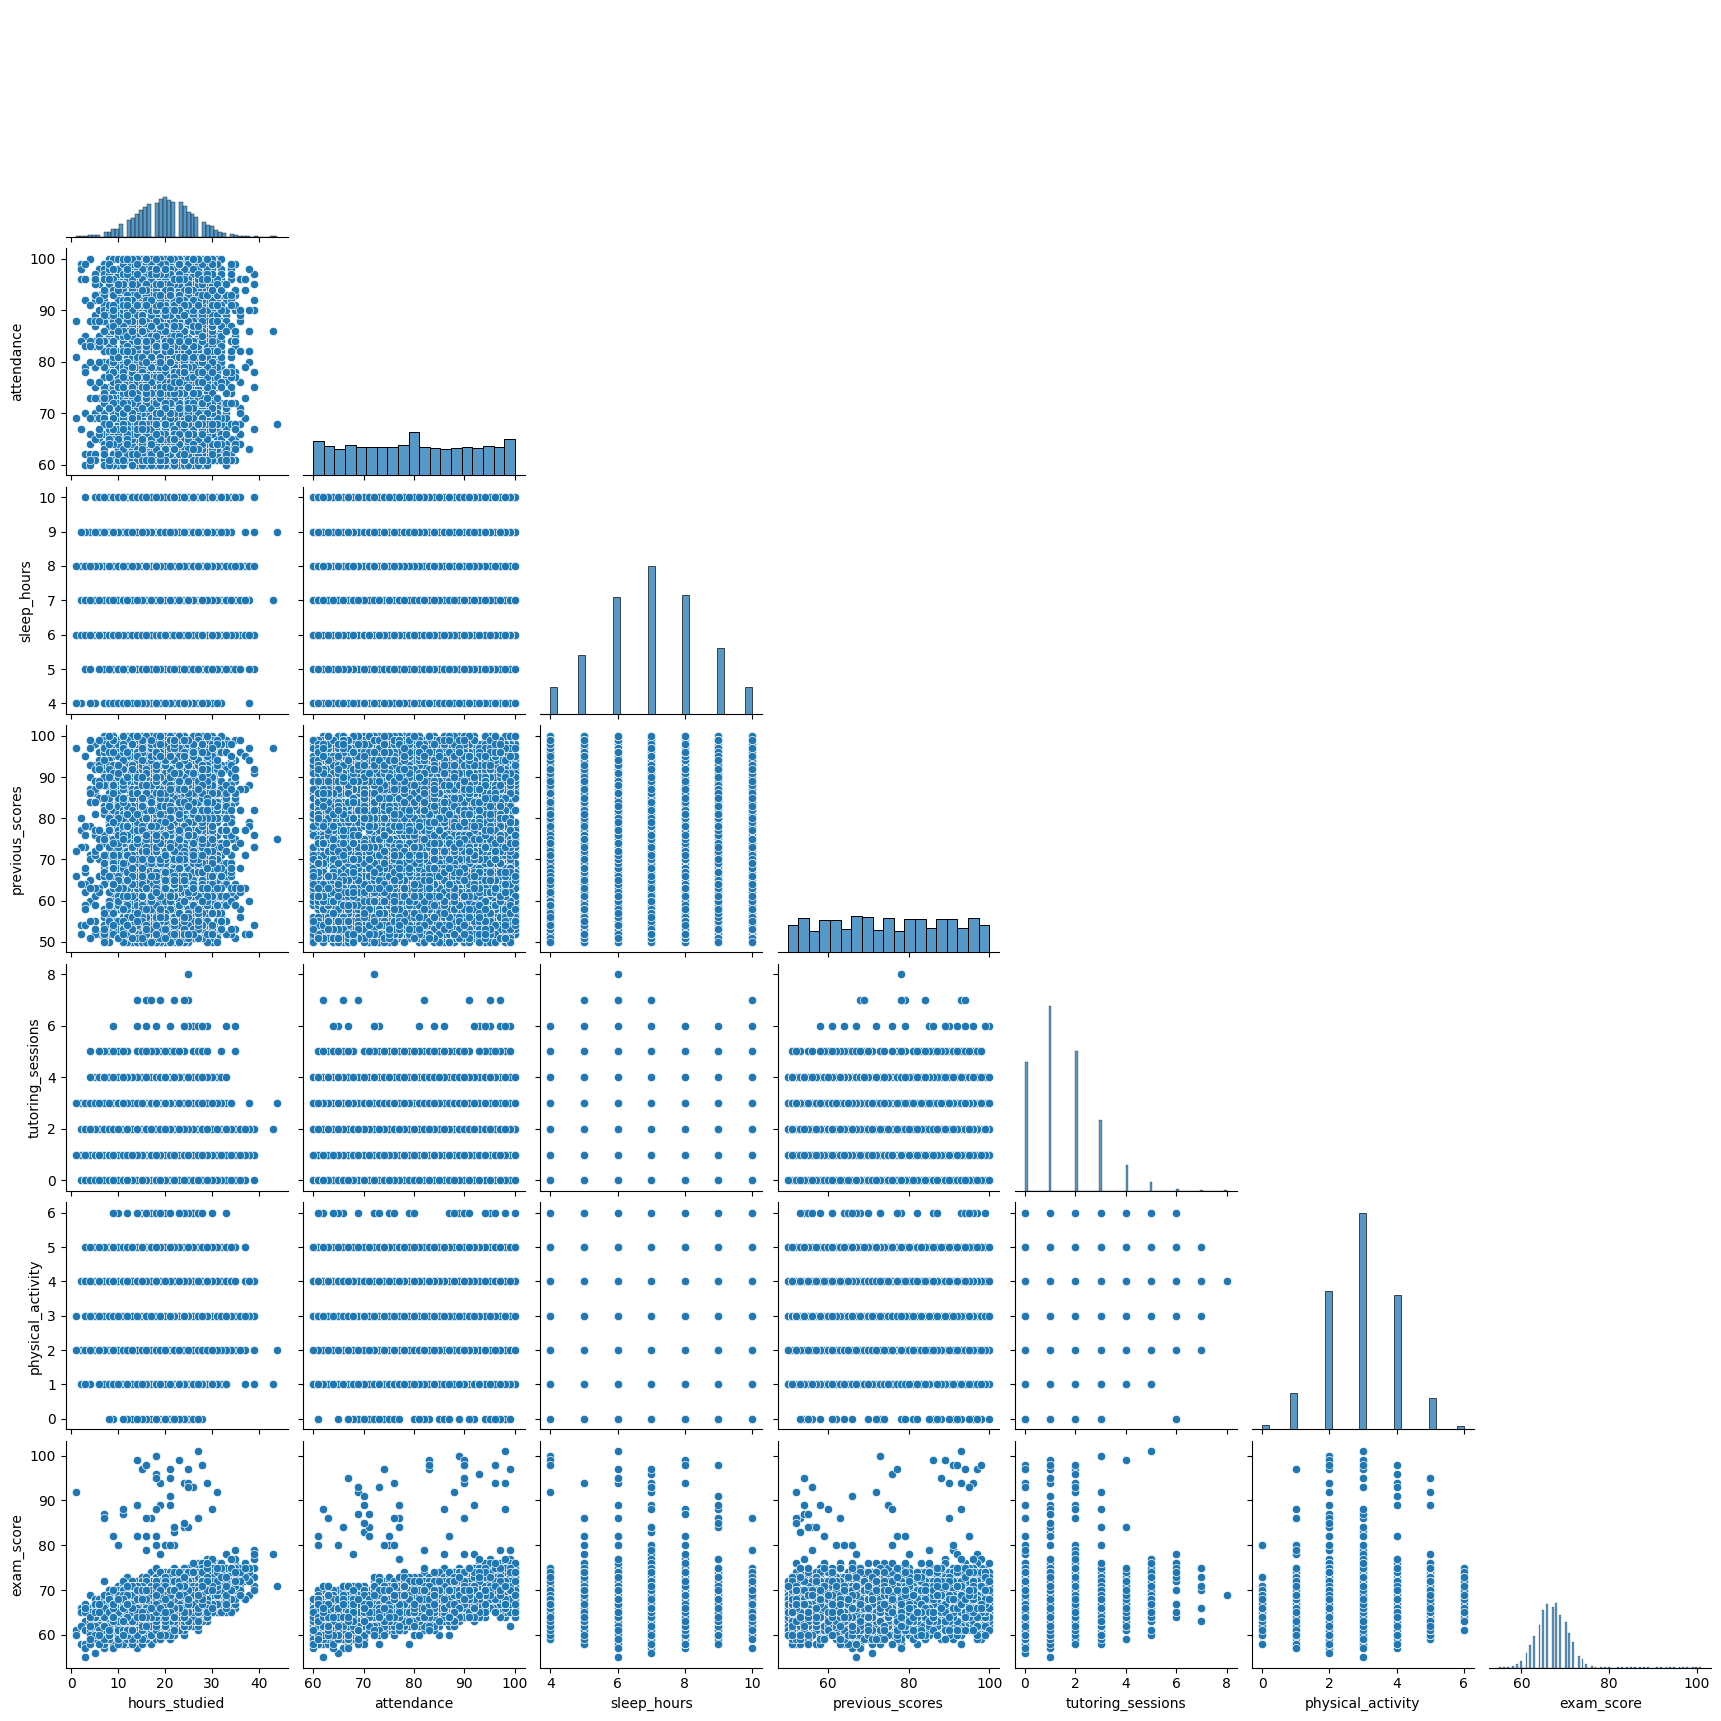

In [45]:
# plot pair wise relationship
sns.pairplot(df[numerical_cols], corner=True)
plt.show()


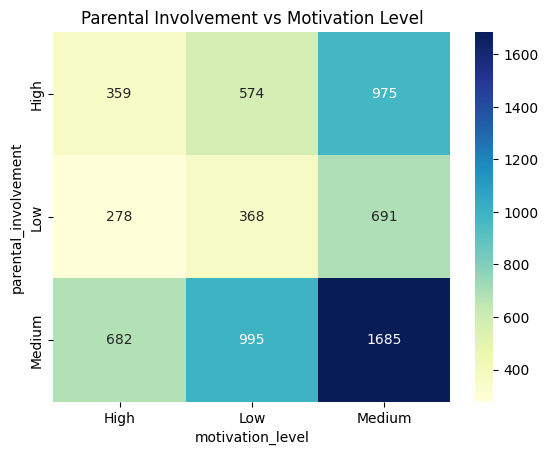

In [48]:
# to show categorical vs categorical relationship
# Example: parental_involvement vs motivation_level
ct = pd.crosstab(df["parental_involvement"], df["motivation_level"])
sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Parental Involvement vs Motivation Level")
plt.show()


In [49]:
# aggreating one variable vs another
agg_mean = df.groupby("motivation_level")["exam_score"].mean()
print(agg_mean)

motivation_level
High      67.704321
Low       66.752194
Medium    67.330648
Name: exam_score, dtype: float64


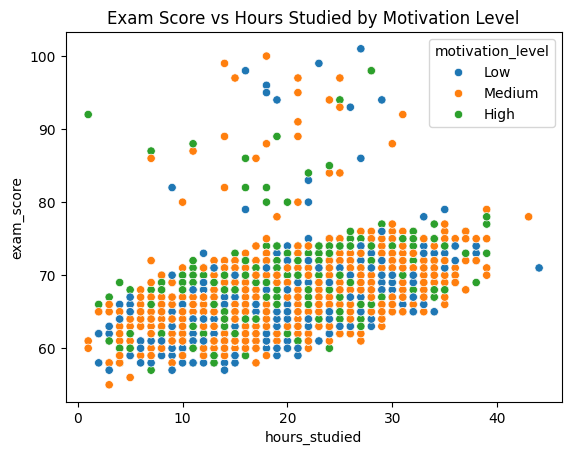

In [52]:
# categorical vs numerical example
sns.scatterplot(x="hours_studied", y="exam_score", hue="motivation_level", data=df)
plt.title("Exam Score vs Hours Studied by Motivation Level")
plt.show()


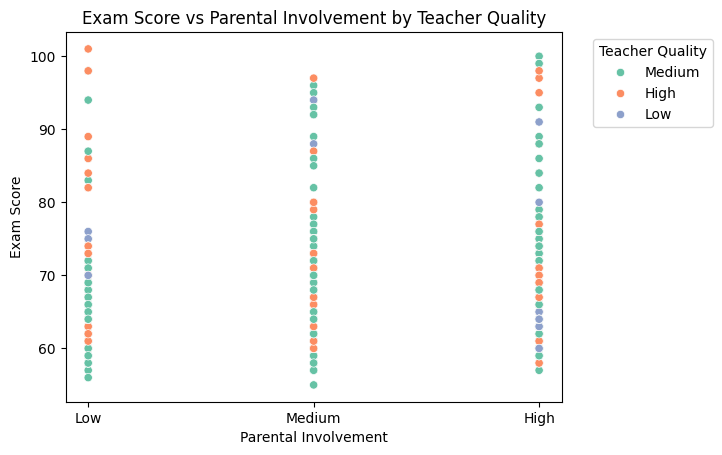

In [53]:
sns.scatterplot(
    x="parental_involvement",
    y="exam_score",
    hue="teacher_quality",
    data=df,
    palette="Set2",
)
plt.title("Exam Score vs Parental Involvement by Teacher Quality")
plt.xlabel("Parental Involvement")
plt.ylabel("Exam Score")
plt.legend(title="Teacher Quality", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


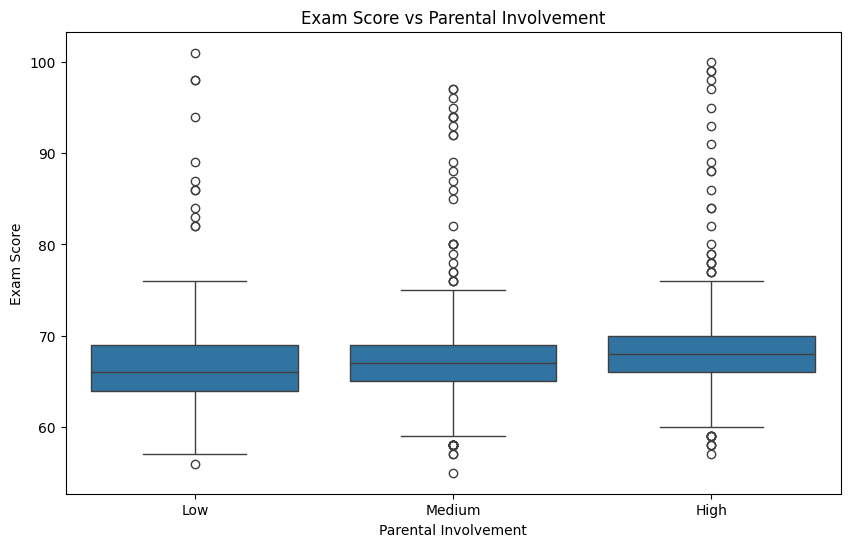

In [ ]:
# another example of categorical vs numerical no hue
plt.figure(figsize=(10, 6))
sns.boxplot(x="parental_involvement",y="exam_score",data=df)
plt.title("Exam Score vs Parental Involvement")
plt.xlabel("Parental Involvement")
plt.ylabel("Exam Score")
plt.show()
